----------------------------------------------
1- Importando dataset y vistazo rapido
----------------------------------------------
----------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_validate
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time
from scipy.stats import loguniform
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC


df_heart = pd.read_csv("Medicaldataset.csv")

print(f"Numero de columnas: {df_heart.shape[1]}")
print(f"Numero de filas: {df_heart.shape[0]}")

pd.set_option('display.width', 1000)
print(df_heart.head())

Numero de columnas: 9
Numero de filas: 1319
   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  Blood sugar  CK-MB  Troponin    Result
0   64       1          66                      160                        83        160.0   1.80     0.012  negative
1   21       1          94                       98                        46        296.0   6.75     1.060  positive
2   55       1          64                      160                        77        270.0   1.99     0.003  negative
3   64       1          70                      120                        55        270.0  13.87     0.122  positive
4   55       1          64                      112                        65        300.0   1.08     0.003  negative


----------------------------------------------
2- Verificando tipos de datos
----------------------------------------------
----------------------------------------------

In [2]:
print("Tipos de datos:")
print(df_heart.info())

Tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB
None


----------------------------------------------
3- Verificando si existen instancias/filas duplicadas
----------------------------------------------
----------------------------------------------

In [3]:
filas_duplicadas = df_heart.duplicated().sum()

if filas_duplicadas > 0:
    print(f"Se encontraron {filas_duplicadas} filas duplicadas en el conjunto train.")
    #Mostrar las filas duplicadas
    print("Muestra de filas duplicadas:")
    print(df_heart[df_heart.duplicated()].head())
else:
    print("No se encontraron filas duplicadas en el conjunto de datos.")

No se encontraron filas duplicadas en el conjunto de datos.


----------------------------------------------
4- Mapeando la variable objetivo para modelo de clasificación
----------------------------------------------
----------------------------------------------

In [4]:
df_heart["Result"] = df_heart["Result"].map({"positive": 1, "negative": 0})

pd.set_option('display.width', 1000)
print(df_heart.head())

   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  Blood sugar  CK-MB  Troponin  Result
0   64       1          66                      160                        83        160.0   1.80     0.012       0
1   21       1          94                       98                        46        296.0   6.75     1.060       1
2   55       1          64                      160                        77        270.0   1.99     0.003       0
3   64       1          70                      120                        55        270.0  13.87     0.122       1
4   55       1          64                      112                        65        300.0   1.08     0.003       0


----------------------------------------------
5- Distribución de atributos
----------------------------------------------
----------------------------------------------

Distribuciones originales:


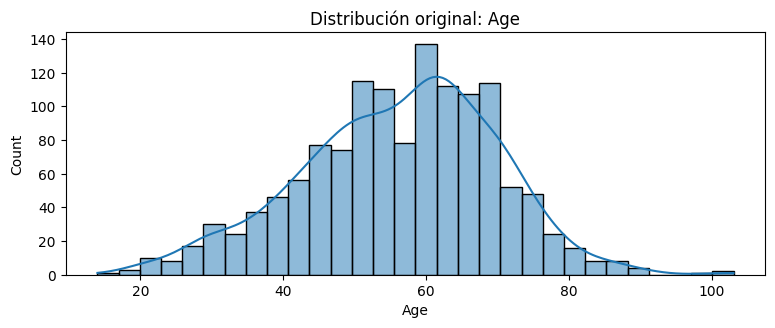

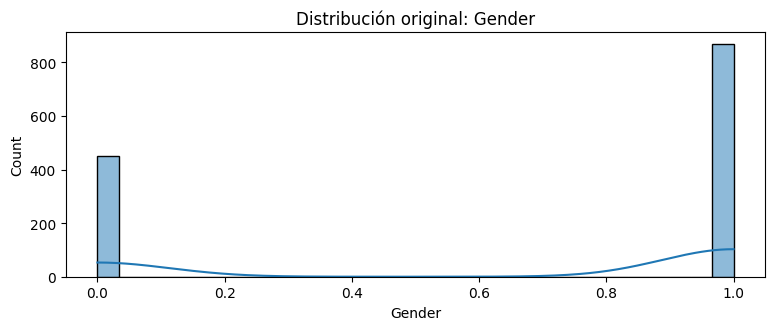

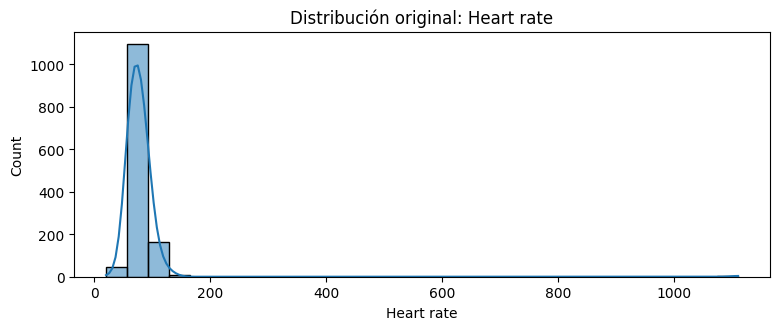

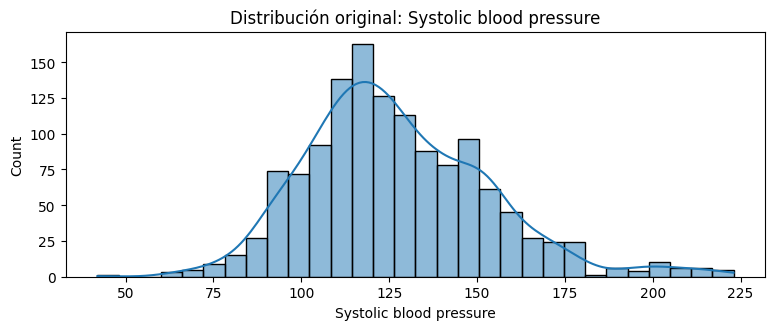

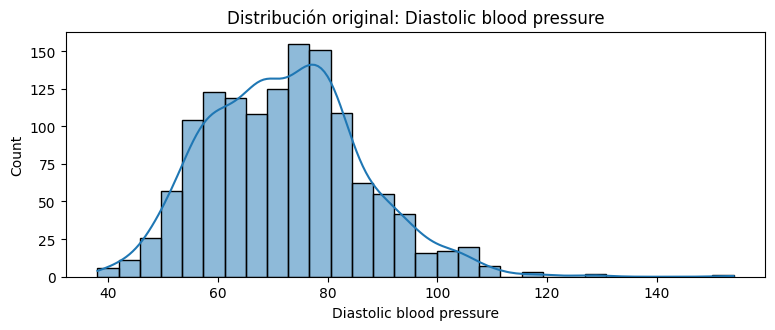

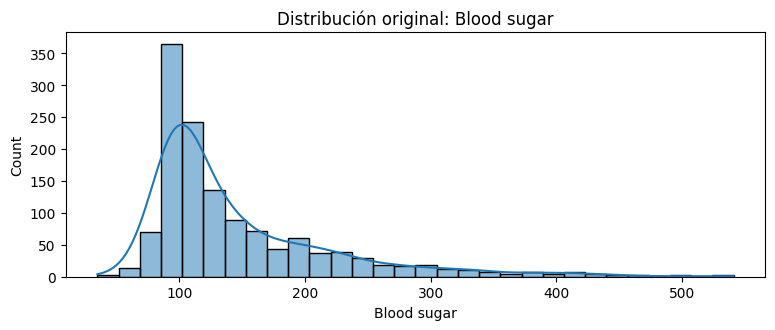

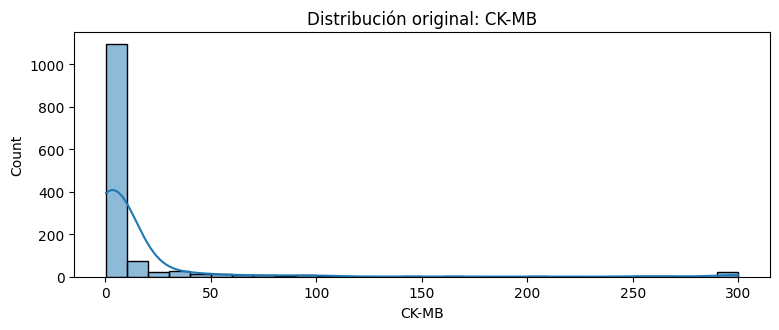

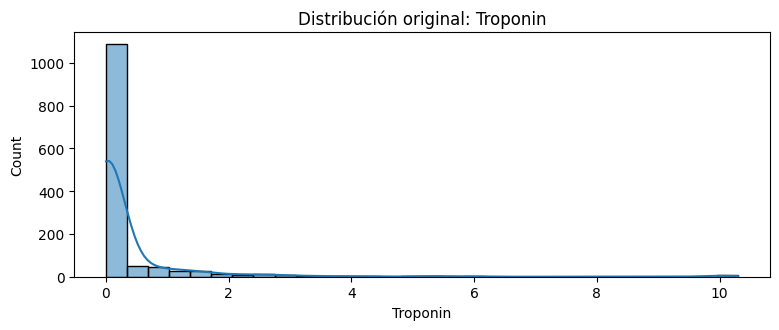

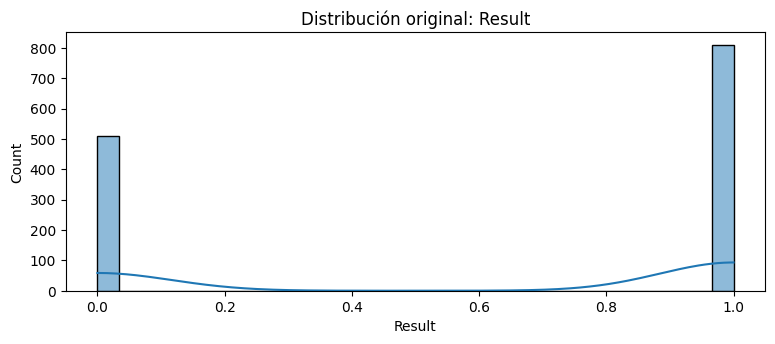

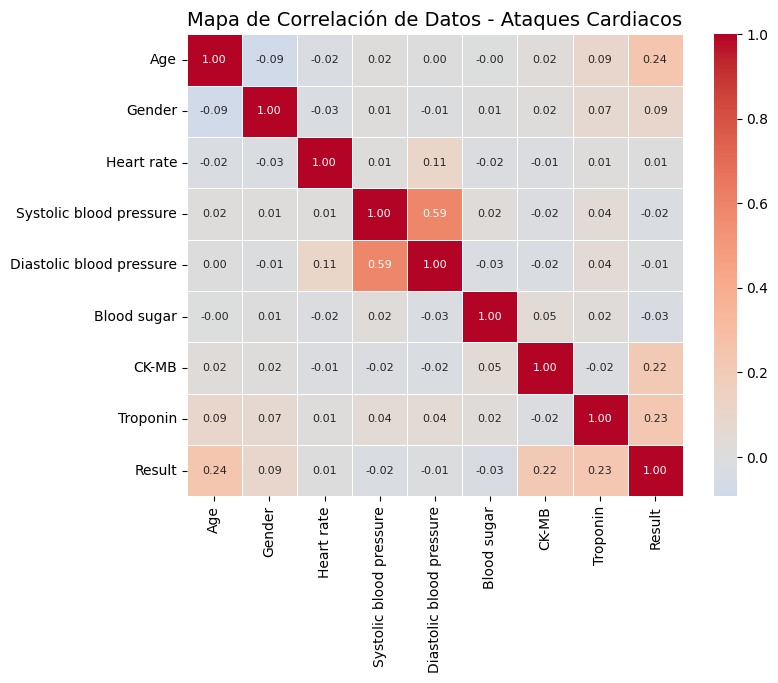

In [5]:
# Filtrar solo las columnas numéricas
numeric_cols = df_heart.select_dtypes(include=[np.number]).columns.tolist()

# Graficar las distribuciones originales
print("Distribuciones originales:")

for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(15, len(numeric_cols) * 3))
    plt.subplot(len(numeric_cols), 2, 2 * i + 1)
    sns.histplot(df_heart[col], kde=True, bins=30)
    plt.title(f'Distribución original: {col}')
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(8, 6)) 
sns.heatmap(df_heart.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0, 
            linewidths=0.5, annot_kws={"size": 8}) 
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Mapa de Correlación de Datos - Ataques Cardiacos", fontsize=14)
plt.show()

----------------------------------------------
6- Transformaciones de atributos
----------------------------------------------
----------------------------------------------

Winsorize aplicado en columna: Heart rate
Winsorize aplicado en columna: CK-MB
Winsorize aplicado en columna: Troponin
Winsorize aplicado en columna: Diastolic blood pressure
Winsorize aplicado en columna: Blood sugar


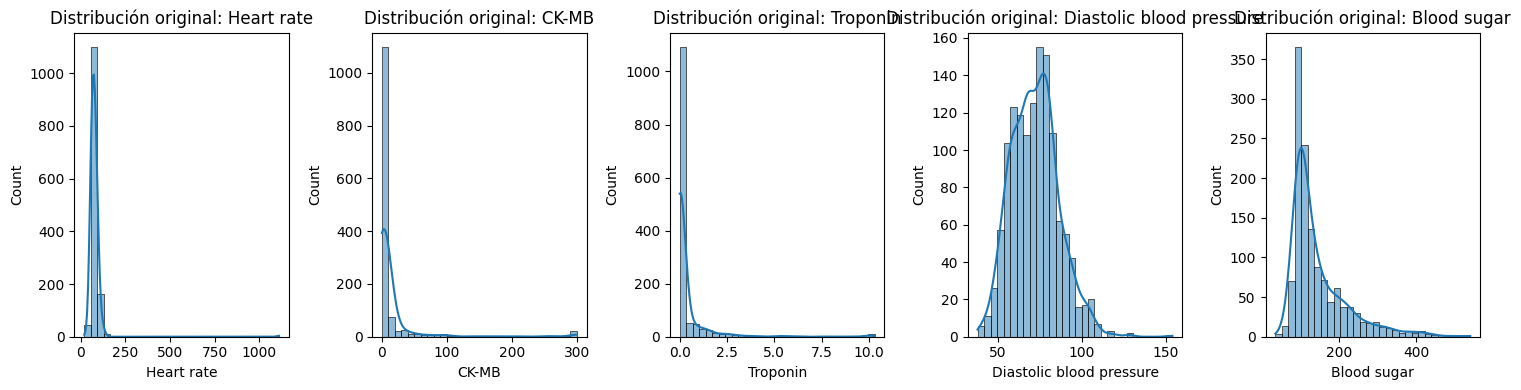

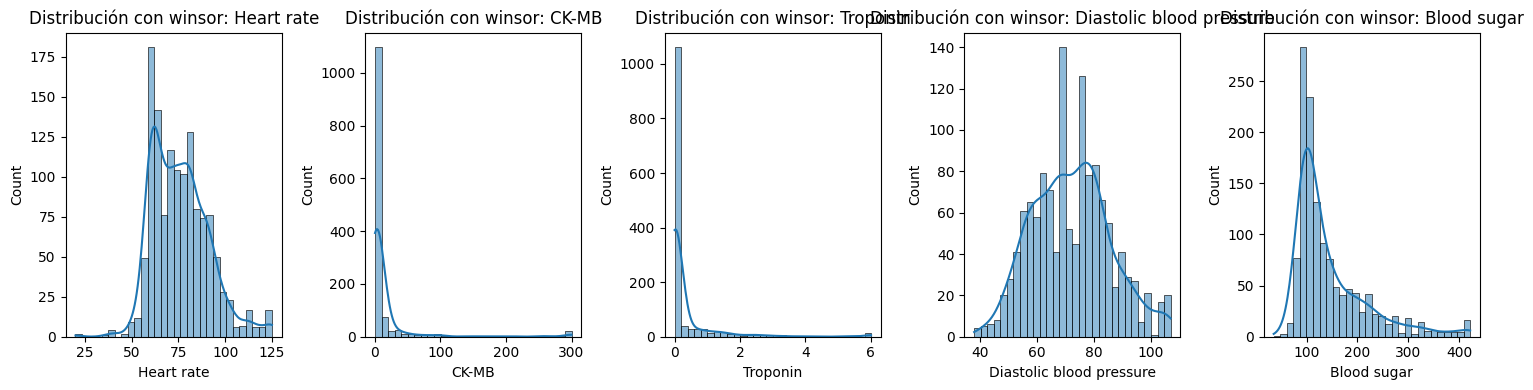

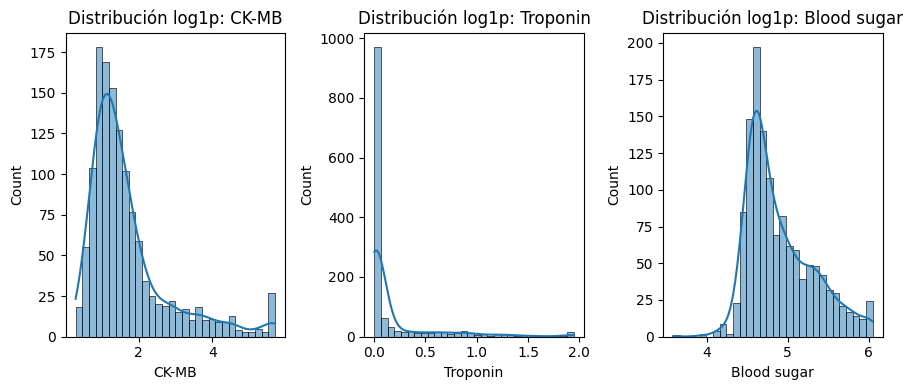

In [6]:
# Columnas a transformar
cols_log = ['Heart rate', 'CK-MB', 'Troponin', 'Diastolic blood pressure', 'Blood sugar']

# Aplicar winsorize (1% por debajo y 1% por arriba)
df_heart_winsor = df_heart.copy()
for col in cols_log:
    col_data = df_heart[col].values
    winsorized_data = winsorize(col_data, limits=[0.0, 0.01])
    df_heart_winsor[col] = winsorized_data
    print(f"Winsorize aplicado en columna: {col}")

# Graficar distribuciones originales (tras winsorize)
plt.figure(figsize=(15, 4))
for i, col in enumerate(cols_log):
    plt.subplot(1, 5, i + 1)
    sns.histplot(df_heart[col], kde=True, bins=30)
    plt.title(f'Distribución original: {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 4))
for i, col in enumerate(cols_log):
    plt.subplot(1, 5, i + 1)
    sns.histplot(df_heart_winsor[col], kde=True, bins=30)
    plt.title(f'Distribución con winsor: {col}')
plt.tight_layout()
plt.show()

cols_log = ['CK-MB', 'Troponin', 'Blood sugar']

# Aplicar transformación logarítmica
df_heart_winsor_log = df_heart_winsor.copy()
for col in cols_log:
    df_heart_winsor_log[col] = np.log1p(df_heart_winsor_log[col])

# Graficar distribuciones después del log1p
plt.figure(figsize=(15, 4))
for i, col in enumerate(cols_log):
    plt.subplot(1, 5, i + 1)
    sns.histplot(df_heart_winsor_log[col], kde=True, bins=30)
    plt.title(f'Distribución log1p: {col}')
plt.tight_layout()
plt.show()

----------------------------------------------
7- Distribuciones despues de transformaciones
----------------------------------------------
----------------------------------------------

Distribuciones finales:


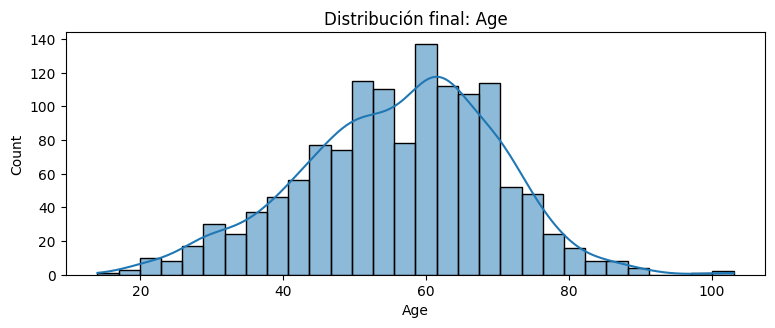

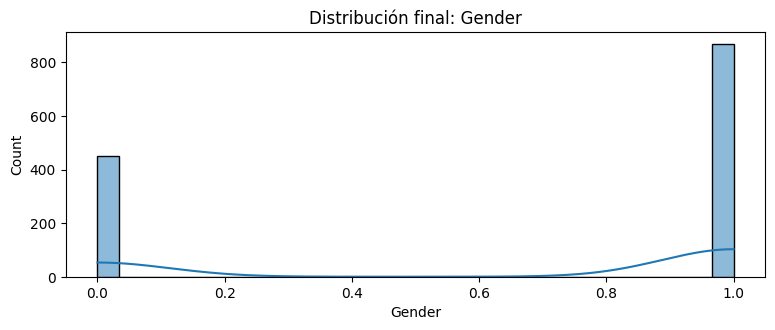

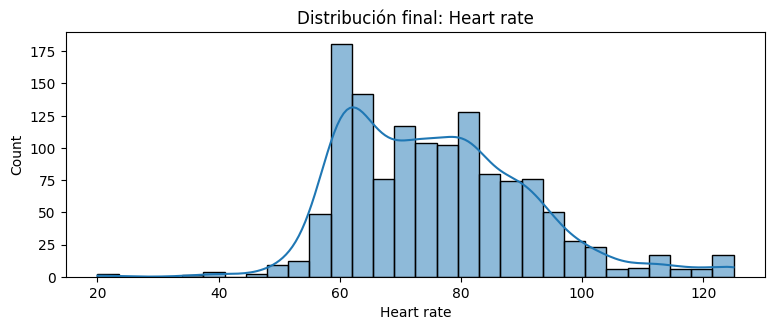

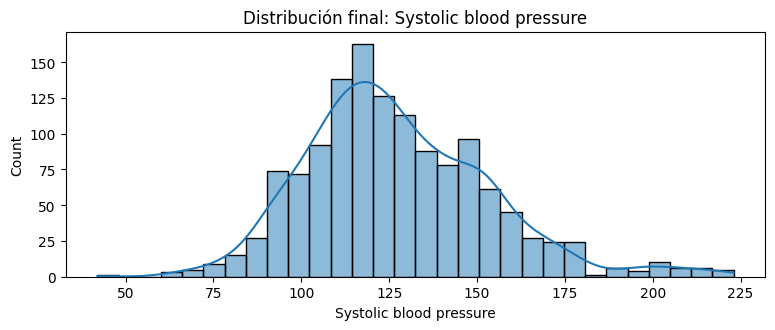

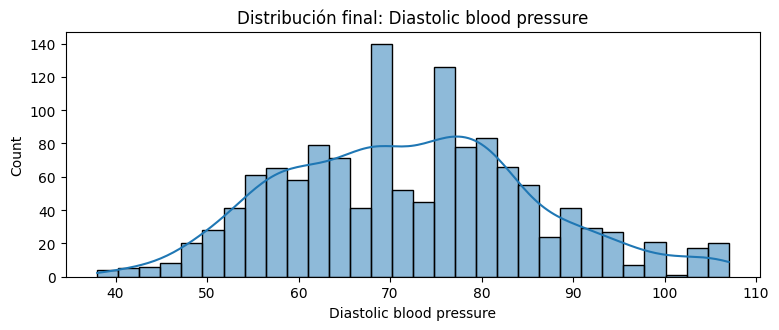

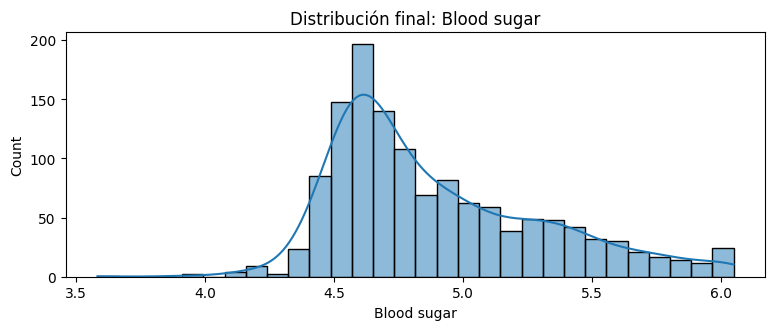

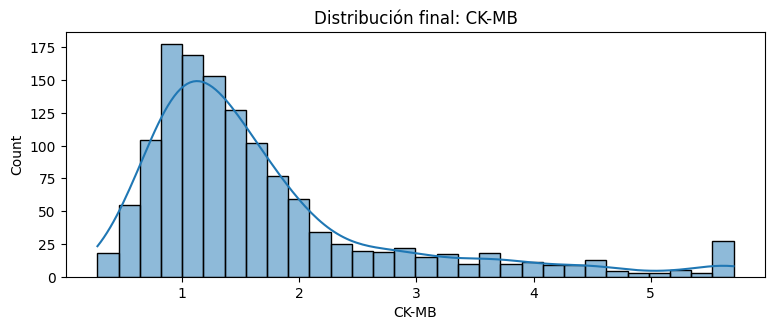

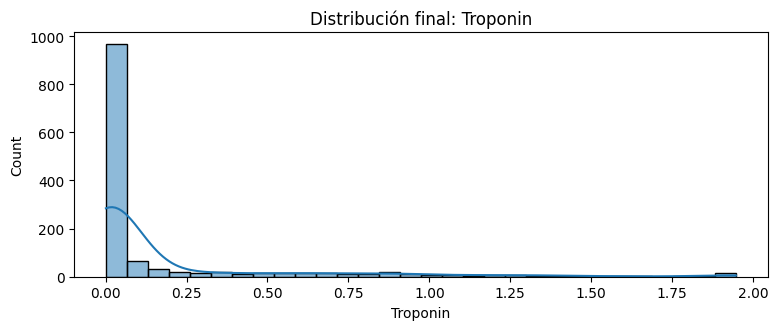

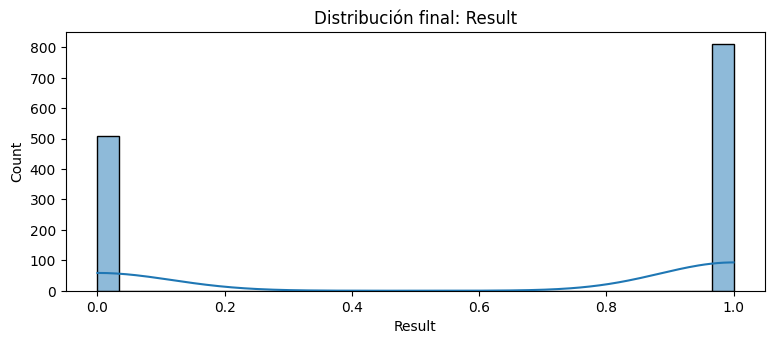

In [7]:
# Graficar las distribuciones despues de transformaciones
print("Distribuciones finales:")

for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(15, len(numeric_cols) * 3))
    plt.subplot(len(numeric_cols), 2, 2 * i + 1)
    sns.histplot(df_heart_winsor_log[col], kde=True, bins=30)
    plt.title(f'Distribución final: {col}')
    plt.tight_layout()
    plt.show()

----------------------------------------------
8- Atributos mas relevantes
----------------------------------------------
----------------------------------------------

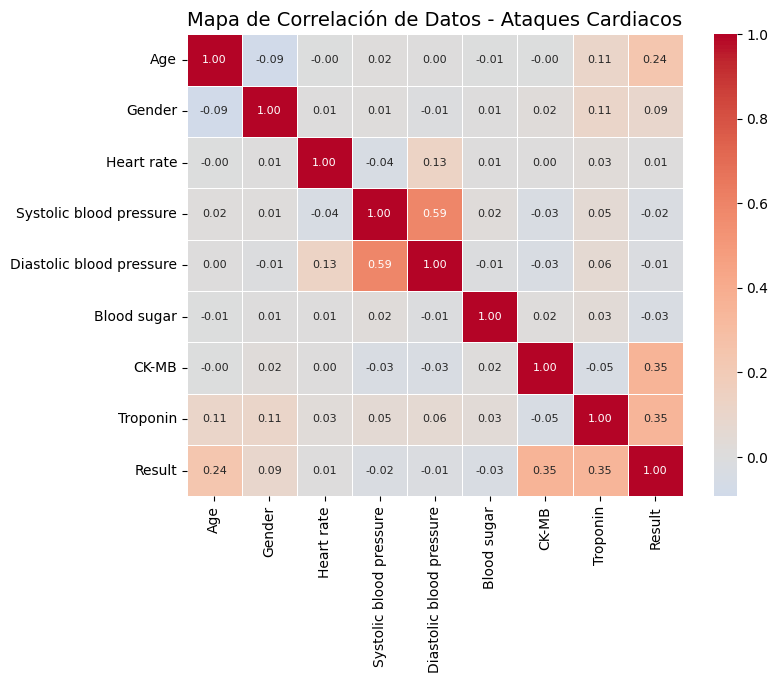

In [8]:
plt.figure(figsize=(8, 6)) 
sns.heatmap(df_heart_winsor_log.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0, 
            linewidths=0.5, annot_kws={"size": 8}) 
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Mapa de Correlación de Datos - Ataques Cardiacos", fontsize=14)
plt.show()

C:\Users\sahid\AppData\Local\Temp\ipykernel_34376\3709191492.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=anova_scores, x='F-score (ANOVA)', y='Atributo', palette='viridis')


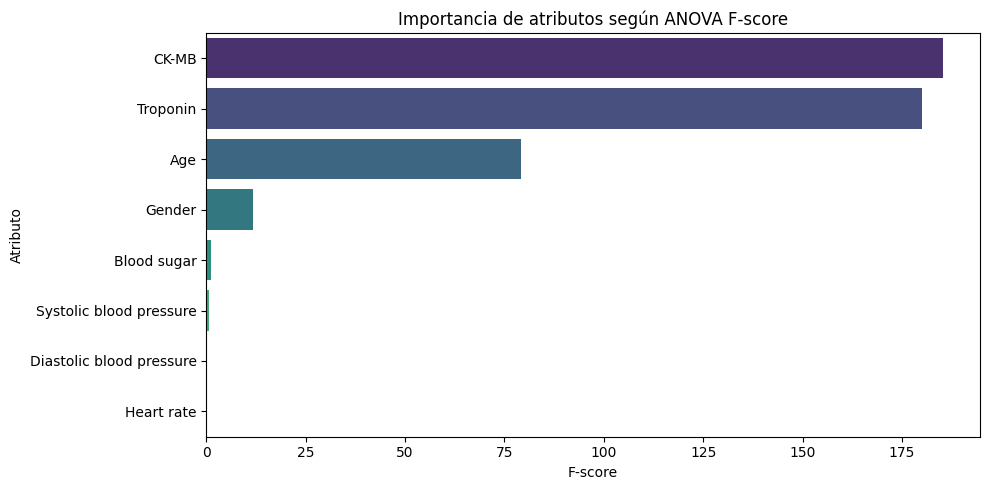

,Atributo,F-score (ANOVA),p-value
6,CK-MB,185.327626,1.386361e-39
7,Troponin,180.106986,1.389282e-38
0,Age,79.147830,1.861645e-18
1,Gender,11.849969,5.946979e-04
5,Blood sugar,1.228483,2.679046e-01
3,Systolic blood pressure,0.571406,4.498359e-01
4,Diastolic blood pressure,0.184435,6.676599e-01
2,Heart rate,0.035493,8.505951e-01


In [9]:
X = df_heart_winsor_log.drop(columns=['Result']) 
y = df_heart_winsor_log['Result']

# Aplicar SelectKBest con ANOVA F-score
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Resultados en Dataframe
anova_scores = pd.DataFrame({
    'Atributo': X.columns,
    'F-score (ANOVA)': selector.scores_,
    'p-value': selector.pvalues_
}).sort_values(by='F-score (ANOVA)', ascending=False)

# Grafica de resultados
plt.figure(figsize=(10, 5))
sns.barplot(data=anova_scores, x='F-score (ANOVA)', y='Atributo', palette='viridis')
plt.title('Importancia de atributos según ANOVA F-score')
plt.xlabel('F-score')
plt.ylabel('Atributo')
plt.tight_layout()
plt.show()

anova_scores

----------------------------------------------
9- Seleccion de Atributos mas Relevantes
----------------------------------------------
----------------------------------------------

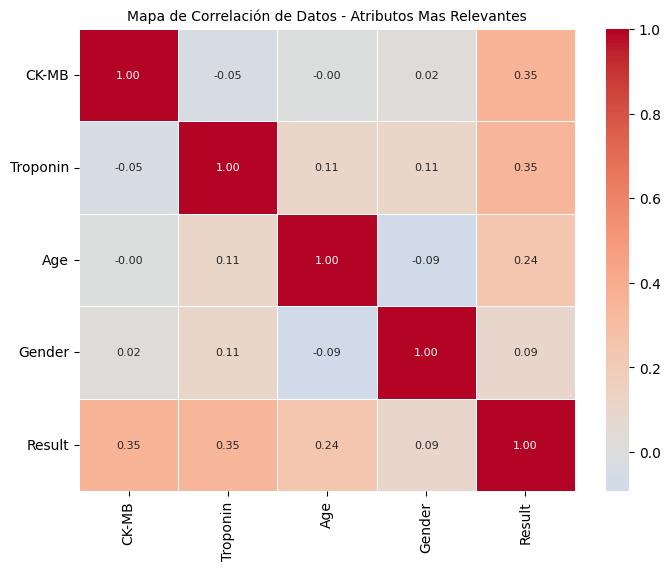

In [10]:
atributos_relevantes = ['CK-MB', 'Troponin', 'Age', 'Gender', 'Result']
df_heart_winsor_log_filtrado = df_heart_winsor_log[atributos_relevantes]

plt.figure(figsize=(8, 6)) 
sns.heatmap(df_heart_winsor_log_filtrado.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0, 
            linewidths=0.5, annot_kws={"size": 8}) 
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Mapa de Correlación de Datos - Atributos Mas Relevantes", fontsize=10)
plt.show()

----------------------------------------------
10- División del dataset y normalización de datos
----------------------------------------------
----------------------------------------------

In [11]:
atributo = 'Result'
X = df_heart_winsor_log_filtrado.drop(columns=[atributo])
Y = df_heart_winsor_log_filtrado.Result

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=16)
print(X)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

print("Dataset dividido y normalizado")

joblib.dump(scaler, 'modelo_standardscaler.pkl')
print("Modelo exportado correctamente.")

         CK-MB  Troponin  Age  Gender
0     1.029619  0.011929   64       1
1     2.047693  0.722706   21       1
2     1.095273  0.002996   55       1
3     2.699346  0.115113   64       1
4     0.732368  0.002996   55       1
...        ...       ...  ...     ...
1314  0.966984  0.005982   44       1
1315  0.845868  0.158712   66       1
1316  0.806476  1.658228   45       1
1317  1.916923  0.306749   54       1
1318  3.949126  1.018847   51       1

[1319 rows x 4 columns]
Dataset dividido y normalizado
Modelo exportado correctamente.


----------------------------------------------
11- Ajuste de Hiperarametros
----------------------------------------------
----------------------------------------------

In [12]:
# Búsqueda de Cuadrícula
# Modelo de Regresión Logística
param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100], # Controla la penalización que se le aplica al tamaño de los coeficientes, valores más altos significan menos regularización
    'solver': ['liblinear', 'lbfgs', 'saga'], # Algoritmos de optimización para la regresión logística
    'max_iter': [100, 200, 300, 500, 1000], # Número máximo de iteraciones para la convergencia
    'class_weight': [None, 'balanced'], # Manejo de clases desbalanceadas
    'penalty': ['l2'] # Tipo de regularización a aplicar, l2 es la regularización Ridge
}

grid_log = GridSearchCV(
    LogisticRegression(max_iter=1000), # Modelo base para la Regresión Logística
    param_grid=param_grid_log, # Hiperparámetros a evaluar
    scoring='accuracy', # Métricas a utilizar para evaluar el rendimiento del modelo
    cv=10, # Número de folds para la validación cruzada (10 folds)
    n_jobs=-1, # Utilizar todos los núcleos disponibles para el procesamiento
    verbose=1 # Mostrar el progreso del GridSearch
)

print("Búsqueda de Cuadrícula: Regresión Logística")
grid_log.fit(X_train_norm, Y_train)
print("Mejores parámetros:", grid_log.best_params_)
print("Mejor puntaje:", grid_log.best_score_)  # Aseguramos que se imprime el mejor score
best_log_model_grid = grid_log.best_estimator_
joblib.dump(best_log_model_grid, 'best_log_model_grid_1st_dataset.pkl')
print("Modelo exportado.")

# Modelo de Naive Bayes
param_grid_naive = {
    'var_smoothing': list(np.logspace(-15, -5, 15)) + list(np.logspace(-11, -5, 10)) + [1e-9, 1e-8, 1e-7, 1e-6], # Suavización de la varianza
    'priors': [None, [0.3, 0.7], [0.5, 0.5]] # Ejemplo para clasificación binaria
}

grid_search_naive = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=param_grid_naive,
    scoring='accuracy',
    cv=10, # Aseguramos 10 folds
)

print("\nBúsqueda de Cuadrícula: Naive Bayes")
grid_search_naive.fit(X_train_norm, Y_train)
print("Mejores hiperparámetros:", grid_search_naive.best_params_)
print("Mejor puntaje:", grid_search_naive.best_score_)
best_naive_model_grid = grid_search_naive.best_estimator_
joblib.dump(best_naive_model_grid, 'best_naive_model_grid_1st_dataset.pkl')
print("Modelo exportado.")

# Modelo de KNN
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 29, 21, 23, 25, 27, 29, 31], # Número de vecinos
    'weights': ['uniform', 'distance'], # Función de peso (uniforme o basado en la distancia)
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev', 'hamming', 'braycurtis'] # Métricas de distancia
}

grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring='accuracy',
    cv=10, # 10 folds
)
print("\nBúsqueda de Cuadrícula: KNN")
grid_search_knn.fit(X_train_norm, Y_train)
print("Mejores hiperparámetros:", grid_search_knn.best_params_)
print("Mejor puntaje:", grid_search_knn.best_score_)
best_knn_model_grid = grid_search_knn.best_estimator_
joblib.dump(best_knn_model_grid, 'best_knn_model_grid_1st_dataset.pkl')
print("Modelo exportado.")

# Modelo de SVM
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100], # Parámetro de regularización
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], # Tipos de kernel
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1], # Parámetro para el kernel RBF
    'degree': [3, 4, 5], # solo aplica si kernel = 'poly'
    'class_weight': [None, 'balanced']
}

grid_search_svm = GridSearchCV(estimator=SVC(), param_grid=param_grid_svm, cv=10, scoring='accuracy')  # 10 folds
grid_search_svm.fit(X_train_norm, Y_train)
print("\nBúsqueda de Cuadrícula: SVM")
print("Mejores hiperparámetros:", grid_search_svm.best_params_)
print("Mejor puntaje:", grid_search_svm.best_score_)
best_svm_model_grid = grid_search_svm.best_estimator_
joblib.dump(best_svm_model_grid, 'best_svm_model_grid_1st_dataset.pkl')
print("Modelo exportado.")

# Modelo de Árboles de Decisión
param_grid_tree = {
    'max_depth': [2, 3, 4, 5, 10, 20, None],  # Profundidad máxima del árbol
    'min_samples_split': [2, 3, 4, 5, 6, 10],  # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 3, 4, 5, 6],  # Mínimo número de muestras en una hoja
    'max_features': [None, 'sqrt', 'log2'],  # Características máximas a considerar en cada división
    'criterion': ['gini', 'entropy'],  # Criterio para dividir los nodos
    'class_weight': [None, 'balanced'],  # Para manejar clases desbalanceadas
    'splitter': ['best', 'random'],
}

grid_search_tree = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_tree, cv=10, scoring='accuracy')  # 10 folds
grid_search_tree.fit(X_train_norm, Y_train)
print("\nBúsqueda de Cuadrícula: Árboles de Decisión")
print("Mejores hiperparámetros:", grid_search_tree.best_params_)
print("Mejor puntaje:", grid_search_tree.best_score_)
best_tree_model_grid = grid_search_tree.best_estimator_
joblib.dump(best_tree_model_grid, 'best_tree_model_grid_1st_dataset.pkl')
print("Modelo exportado.")

# Modelo Perceptron Multicapa
param_grid_mlp = {
    'hidden_layer_sizes': [(10), (50), (100), (10, 50), (50, 100), (100, 50), (50, 50), (10, 10, 10), (150, 75)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],  # Regularización L2
    'learning_rate': ['constant', 'adaptive']
}

grid_mlp = GridSearchCV(
    MLPClassifier(max_iter= 1000), # Modelo base para la Regresión Logística
    param_grid= param_grid_mlp, # Hiperparámetros a evaluar
    scoring='accuracy', # Métricas a utilizar para evaluar el rendimiento del modelo
    cv=10, # Número de folds para la validación cruzada (10 folds)
    n_jobs=-1, # Utilizar todos los núcleos disponibles para el procesamiento
    verbose=1 # Mostrar el progreso del GridSearch
)

print("\nBúsqueda de Cuadrícula: MLP")
grid_mlp.fit(X_train_norm, Y_train)
print("Mejores parámetros:", grid_mlp.best_params_)
print("Mejor puntaje:", grid_mlp.best_score_)  # Aseguramos que se imprime el mejor score
best_mlp_model_grid = grid_mlp.best_estimator_
joblib.dump(best_mlp_model_grid, 'best_mlp_model_grid_1st_dataset.pkl')
print("Modelo exportado.")

Búsqueda de Cuadrícula: Regresión Logística
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
Mejores parámetros: {'C': 100, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Mejor puntaje: 0.8710152740341421
Modelo exportado.

Búsqueda de Cuadrícula: Naive Bayes
Mejores hiperparámetros: {'priors': [0.3, 0.7], 'var_smoothing': np.float64(1e-15)}
Mejor puntaje: 0.7923809523809524
Modelo exportado.

Búsqueda de Cuadrícula: KNN
Mejores hiperparámetros: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Mejor puntaje: 0.8492452830188679
Modelo exportado.

Búsqueda de Cuadrícula: SVM
Mejores hiperparámetros: {'C': 100, 'class_weight': None, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}
Mejor puntaje: 0.963045822102426
Modelo exportado.

Búsqueda de Cuadrícula: Árboles de Decisión
Mejores hiperparámetros: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 1

----------------------------------------------
12- Resultados con datos de prueba
----------------------------------------------
----------------------------------------------

                     Accuracy  Precision    Recall  F1-score
Regresion logistica  0.897727   0.901313  0.897727  0.898457
Naive Bayes          0.734848   0.837301  0.734848  0.733295
KNN                  0.814394   0.844948  0.814394  0.816974
SVM                  0.946970   0.949441  0.946970  0.947313
Arbol de decision    0.981061   0.981125  0.981061  0.981078
MLP                  0.965909   0.966920  0.965909  0.966055


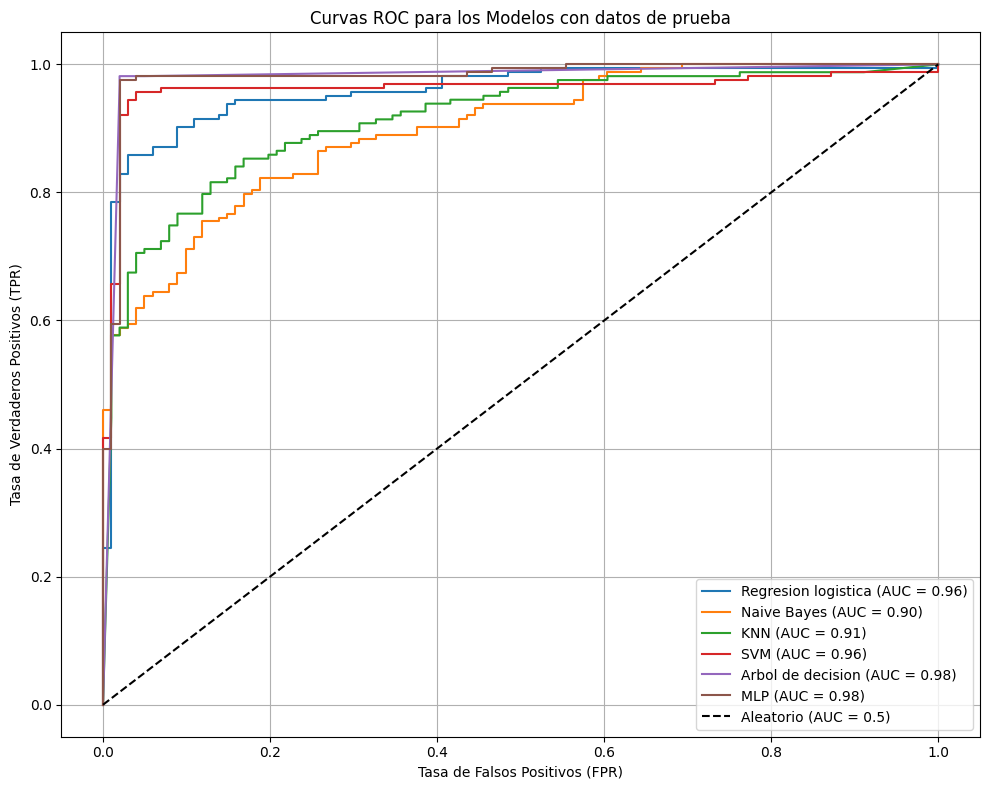

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Diccionario con los modelos a evaluar
modelos = {
    "Regresion logistica": joblib.load("best_log_model_grid_1st_dataset.pkl"),
    "Naive Bayes": joblib.load("best_naive_model_grid_1st_dataset.pkl"),
    "KNN": joblib.load("best_knn_model_grid_1st_dataset.pkl"),
    "SVM": joblib.load("best_svm_model_grid_1st_dataset.pkl"),
    "Arbol de decision": joblib.load("best_tree_model_grid_1st_dataset.pkl"),
    "MLP": joblib.load("best_mlp_model_grid_1st_dataset.pkl")
}

# Crear un diccionario para almacenar métricas
metricas = {}


for nombre, modelo in modelos.items():
    # Obtener predicciones
    y_pred = modelo.predict(X_test_norm)

    # Guardar métricas
    metricas[nombre] = {
        "Accuracy": accuracy_score(Y_test, y_pred),
        "Precision": precision_score(Y_test, y_pred, average='weighted'),
        "Recall": recall_score(Y_test, y_pred, average='weighted'),
        "F1-score": f1_score(Y_test, y_pred, average='weighted')
    }

# Mostrar métricas en formato tabla
df_metricas = pd.DataFrame(metricas).T
print(df_metricas)

#curvas roc

plt.figure(figsize=(10, 8))

for name, modelo in modelos.items():
    if hasattr(modelo, "predict_proba"):
        y_scores = modelo.predict_proba(X_test_norm)[:, 1]
    else:
        y_scores = modelo.decision_function(X_test_norm)

    fpr, tpr, _ = roc_curve(Y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Curva aleatoria
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.5)')

plt.title('Curvas ROC para los Modelos con datos de prueba')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
# Evaluación de modelos
for nombre, modelo in modelos.items():
    print(f"\n--- {nombre} ---")
    
    # Obtener predicciones
    y_pred = modelo.predict(X_test_norm)
    
    # Reporte detallado por clase
    print("\nClassification Report:")
    print(classification_report(Y_test, y_pred))


--- Regresion logistica ---

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       101
           1       0.94      0.89      0.91       163

    accuracy                           0.90       264
   macro avg       0.89      0.90      0.89       264
weighted avg       0.90      0.90      0.90       264


--- Naive Bayes ---

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.99      0.74       101
           1       0.99      0.58      0.73       163

    accuracy                           0.73       264
   macro avg       0.79      0.78      0.73       264
weighted avg       0.84      0.73      0.73       264


--- KNN ---

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       101
           1       0.94      0.75      0.83       163

    accuracy                           0.81    

----------------------------------------------
13- Resultados con datos de entrenamiento
----------------------------------------------
----------------------------------------------

                     Accuracy  Precision    Recall  F1-score
Regresion logistica  0.876777   0.881831  0.876777  0.877761
Naive Bayes          0.779147   0.848175  0.779147  0.780171
KNN                  1.000000   1.000000  1.000000  1.000000
SVM                  0.969668   0.970480  0.969668  0.969782
Arbol de decision    0.994313   0.994313  0.994313  0.994313
MLP                  0.980095   0.980632  0.980095  0.980158


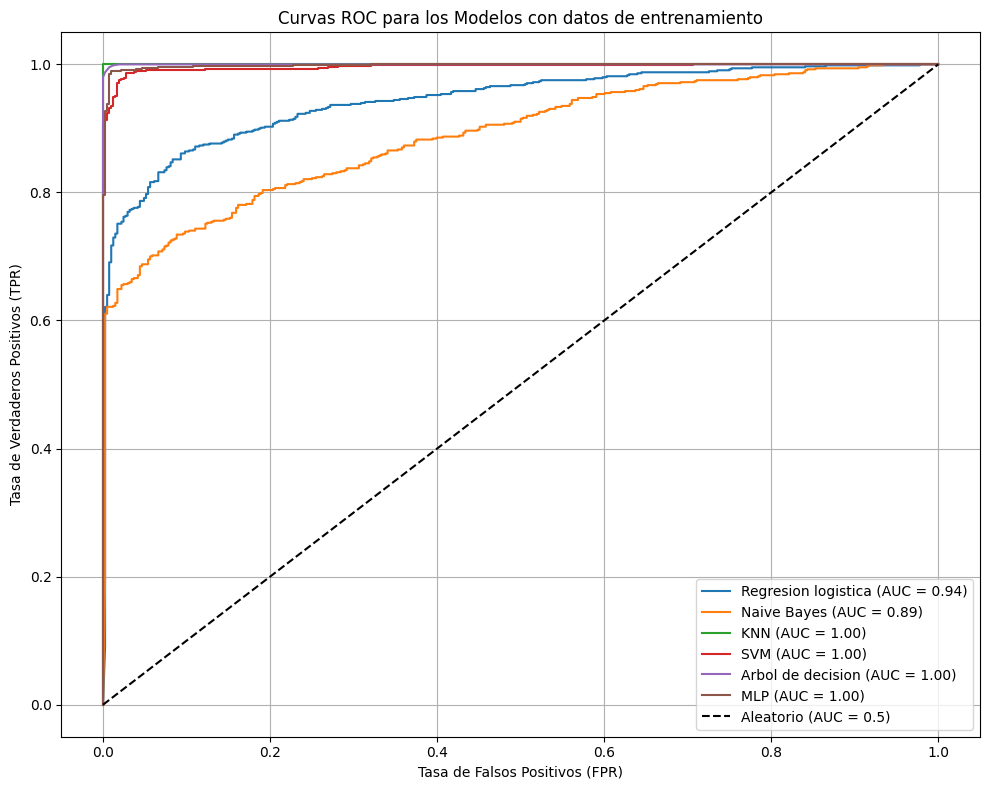

In [21]:
# Crear un diccionario para almacenar métricas
metricas_entrenamiento = {}

for nombre, modelo in modelos.items():
    # Obtener predicciones
    y_pred = modelo.predict(X_train_norm)

    # Guardar métricas
    metricas_entrenamiento[nombre] = {
        "Accuracy": accuracy_score(Y_train, y_pred),
        "Precision": precision_score(Y_train, y_pred, average='weighted'),
        "Recall": recall_score(Y_train, y_pred, average='weighted'),
        "F1-score": f1_score(Y_train, y_pred, average='weighted')
    }

# Mostrar métricas en formato tabla
df_metricas_entrenamiento = pd.DataFrame(metricas_entrenamiento).T
print(df_metricas_entrenamiento)

#curvas roc

plt.figure(figsize=(10, 8))

for name, modelo in modelos.items():
    if hasattr(modelo, "predict_proba"):
        y_scores = modelo.predict_proba(X_train_norm)[:, 1]
    else:
        y_scores = modelo.decision_function(X_train_norm)

    fpr, tpr, _ = roc_curve(Y_train, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Curva aleatoria
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.5)')

plt.title('Curvas ROC para los Modelos con datos de entrenamiento')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

----------------------------------------------
14- Ensamble XGBoost (datos de prueba)
----------------------------------------------
----------------------------------------------

Accuracy: 0.9773
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       101
           1       0.99      0.98      0.98       163

    accuracy                           0.98       264
   macro avg       0.97      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



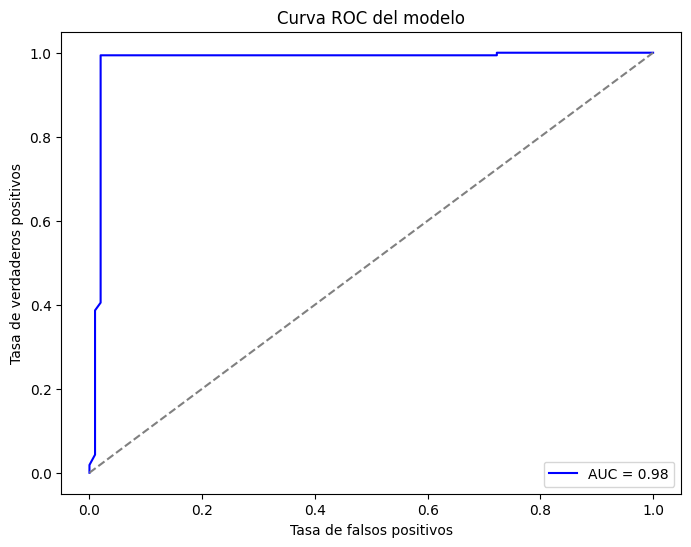

['ensamble_XGB_dataset1_1st_dataset.pkl']

In [22]:
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

modelos_base = [
    ('Regresion logistica', LogisticRegression(C = 100, class_weight = None, max_iter = 100, penalty = 'l2', solver = 'liblinear')),
    #('Naive bayes', GaussianNB(priors = [0.3, 0.7], var_smoothing = np.float64(1e-15))),
    ('KNN', KNeighborsClassifier( metric = 'manhattan', n_neighbors = 11, weights = 'distance')),
    ('SVM', SVC(C = 100, class_weight = None, degree = 3, gamma = 1, kernel = 'poly', probability=True)),
    ('Arboles de decision', DecisionTreeClassifier(class_weight = None, criterion = 'gini', max_depth = 4, max_features = None, min_samples_leaf = 3, min_samples_split = 2, splitter = 'best')),
    ('Perceptron multicapa', MLPClassifier(max_iter = 1000, activation = 'relu', alpha = 0.01, hidden_layer_sizes = (10, 50), learning_rate = 'adaptive', solver = 'adam'))
]

# Metamodelo (combinador)
metamodelo = XGBClassifier()

# Crear el StackingClassifier
stacking_clf = StackingClassifier(cv=10, n_jobs=-1, estimators=modelos_base, final_estimator=metamodelo)

# Entrenar el modelo con los datos seleccionados
stacking_clf.fit(X_train_norm, Y_train)

# Evaluación del modelo en el conjunto de prueba
y_pred = stacking_clf.predict(X_test_norm)

# Métricas de rendimiento
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(Y_test, y_pred):.4f}")
print(classification_report(Y_test, y_pred))



# Obtener probabilidades de predicción del modelo
y_proba = stacking_clf.predict_proba(X_test_norm)[:, 1]  # Solo la probabilidad de la clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(Y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # Línea de referencia
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC del modelo")
plt.legend()
plt.show()

joblib.dump(stacking_clf, 'ensamble_XGB_dataset1_1st_dataset.pkl')

----------------------------------------------
15- Ensamble XGBoost (datos de entrenamiento)
----------------------------------------------
----------------------------------------------

Accuracy: 0.9943
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       408
           1       1.00      0.99      1.00       647

    accuracy                           0.99      1055
   macro avg       0.99      0.99      0.99      1055
weighted avg       0.99      0.99      0.99      1055



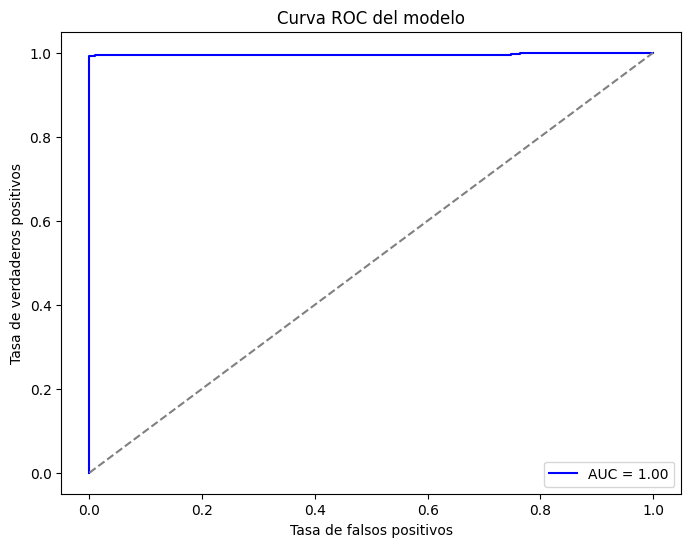

In [23]:
# Evaluación del modelo en el conjunto de entrenamiento
y_pred_train = stacking_clf.predict(X_train_norm)

# Métricas de rendimiento
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(Y_train, y_pred_train):.4f}")
print(classification_report(Y_train, y_pred_train))



# Obtener probabilidades de predicción del modelo
y_proba = stacking_clf.predict_proba(X_train_norm)[:, 1]  # Solo la probabilidad de la clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(Y_train, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # Línea de referencia
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC del modelo")
plt.legend()
plt.show()

----------------------------------------------
16- Ensamble Arbol de Decision (datos de prueba)
----------------------------------------------
----------------------------------------------

Accuracy: 0.9848
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       101
           1       0.99      0.99      0.99       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



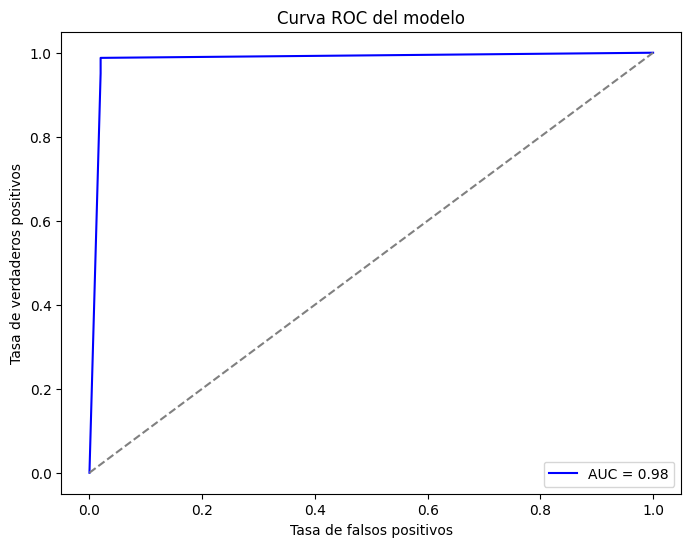

['ensamble_DT_dataset1.pkl']

In [24]:
# Metamodelo (combinador)
metamodelo = DecisionTreeClassifier()

# Crear el StackingClassifier
stacking_clf = StackingClassifier(cv=10, n_jobs=-1, estimators=modelos_base, final_estimator=metamodelo)

# Entrenar el modelo con los datos seleccionados
stacking_clf.fit(X_train_norm, Y_train)

# Evaluación del modelo en el conjunto de prueba
y_pred = stacking_clf.predict(X_test_norm)

# Métricas de rendimiento
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(Y_test, y_pred):.4f}")
print(classification_report(Y_test, y_pred))



# Obtener probabilidades de predicción del modelo
y_proba = stacking_clf.predict_proba(X_test_norm)[:, 1]  # Solo la probabilidad de la clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(Y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # Línea de referencia
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC del modelo")
plt.legend()
plt.show()

joblib.dump(stacking_clf, 'ensamble_DT_dataset1.pkl')

----------------------------------------------
17- Ensamble Arbol de Decision (datos de entrenamiento)
----------------------------------------------
----------------------------------------------

Accuracy: 0.9934
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       408
           1       0.99      1.00      0.99       647

    accuracy                           0.99      1055
   macro avg       0.99      0.99      0.99      1055
weighted avg       0.99      0.99      0.99      1055



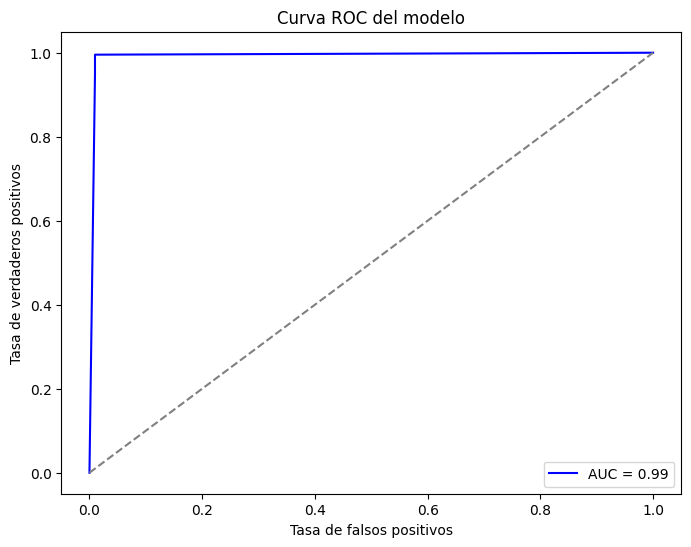

In [25]:
# Evaluación del modelo en el conjunto de entrenamiento
y_pred_train = stacking_clf.predict(X_train_norm)

# Métricas de rendimiento
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(Y_train, y_pred_train):.4f}")
print(classification_report(Y_train, y_pred_train))



# Obtener probabilidades de predicción del modelo
y_proba = stacking_clf.predict_proba(X_train_norm)[:, 1]  # Solo la probabilidad de la clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(Y_train, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # Línea de referencia
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC del modelo")
plt.legend()
plt.show()

----------------------------------------------
18- Ensamble Regresion Logistica (datos de prueba)
----------------------------------------------
----------------------------------------------

Accuracy: 0.9848
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       101
           1       0.99      0.99      0.99       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



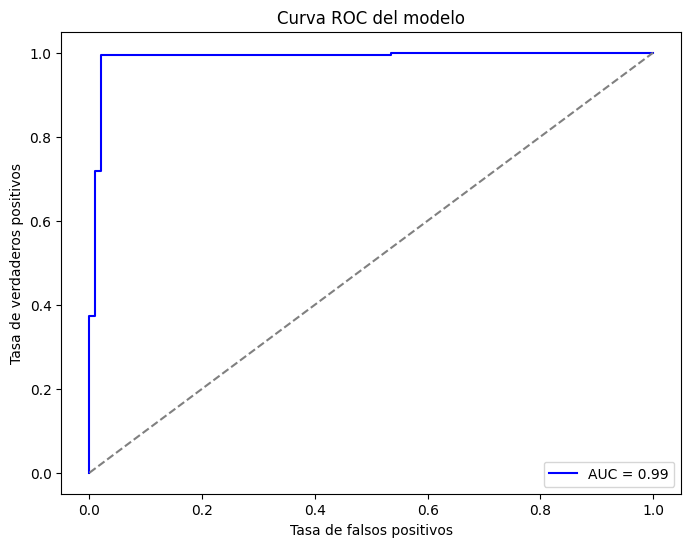

['ensamble_LR_dataset1.pkl']

In [26]:
# Metamodelo (combinador)
metamodelo = LogisticRegression()

# Crear el StackingClassifier
stacking_clf = StackingClassifier(cv=10, n_jobs=-1, estimators=modelos_base, final_estimator=metamodelo)

# Entrenar el modelo con los datos seleccionados
stacking_clf.fit(X_train_norm, Y_train)

# Evaluación del modelo en el conjunto de prueba
y_pred = stacking_clf.predict(X_test_norm)

# Métricas de rendimiento
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(Y_test, y_pred):.4f}")
print(classification_report(Y_test, y_pred))



# Obtener probabilidades de predicción del modelo
y_proba = stacking_clf.predict_proba(X_test_norm)[:, 1]  # Solo la probabilidad de la clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(Y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # Línea de referencia
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC del modelo")
plt.legend()
plt.show()

joblib.dump(stacking_clf, 'ensamble_LR_dataset1.pkl')

----------------------------------------------
19- Ensamble Regresion Logistica (datos de entrenamiento)
----------------------------------------------
----------------------------------------------

Accuracy: 0.9943
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       408
           1       1.00      1.00      1.00       647

    accuracy                           0.99      1055
   macro avg       0.99      0.99      0.99      1055
weighted avg       0.99      0.99      0.99      1055



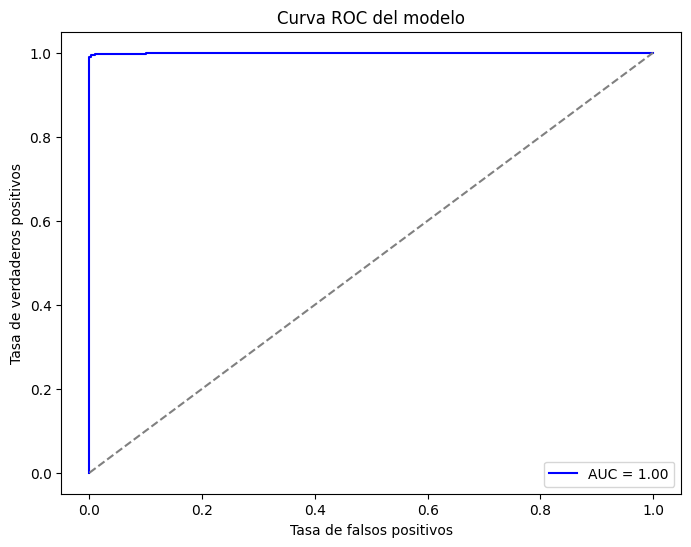

In [27]:
# Evaluación del modelo en el conjunto de entrenamiento
y_pred_train = stacking_clf.predict(X_train_norm)

# Métricas de rendimiento
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(Y_train, y_pred_train):.4f}")
print(classification_report(Y_train, y_pred_train))



# Obtener probabilidades de predicción del modelo
y_proba = stacking_clf.predict_proba(X_train_norm)[:, 1]  # Solo la probabilidad de la clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(Y_train, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # Línea de referencia
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC del modelo")
plt.legend()
plt.show()

----------------------------------------------
20- Ensamble Bosque Aleatorio (datos de prueba)
----------------------------------------------
----------------------------------------------

Accuracy: 0.9886
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       101
           1       0.99      0.99      0.99       163

    accuracy                           0.99       264
   macro avg       0.99      0.99      0.99       264
weighted avg       0.99      0.99      0.99       264



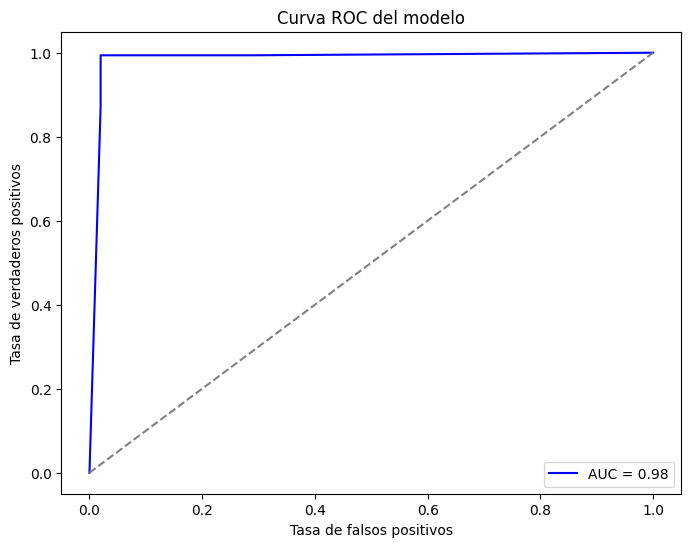

['ensamble_RF_dataset1.pkl']

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Metamodelo (combinador)
metamodelo = RandomForestClassifier()

# Crear el StackingClassifier
stacking_clf = StackingClassifier(cv=10, n_jobs=-1, estimators=modelos_base, final_estimator=metamodelo)

# Entrenar el modelo con los datos seleccionados
stacking_clf.fit(X_train_norm, Y_train)

# Evaluación del modelo en el conjunto de prueba
y_pred = stacking_clf.predict(X_test_norm)

# Métricas de rendimiento
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(Y_test, y_pred):.4f}")
print(classification_report(Y_test, y_pred))


# Obtener probabilidades de predicción del modelo
y_proba = stacking_clf.predict_proba(X_test_norm)[:, 1]  # Solo la probabilidad de la clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(Y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # Línea de referencia
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC del modelo")
plt.legend()
plt.show()

joblib.dump(stacking_clf, 'ensamble_RF_dataset1.pkl')

----------------------------------------------
21- Ensamble Bosque Aleatorio (datos de entrenamiento)
----------------------------------------------
----------------------------------------------

Accuracy: 0.9934
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       408
           1       0.99      1.00      0.99       647

    accuracy                           0.99      1055
   macro avg       0.99      0.99      0.99      1055
weighted avg       0.99      0.99      0.99      1055



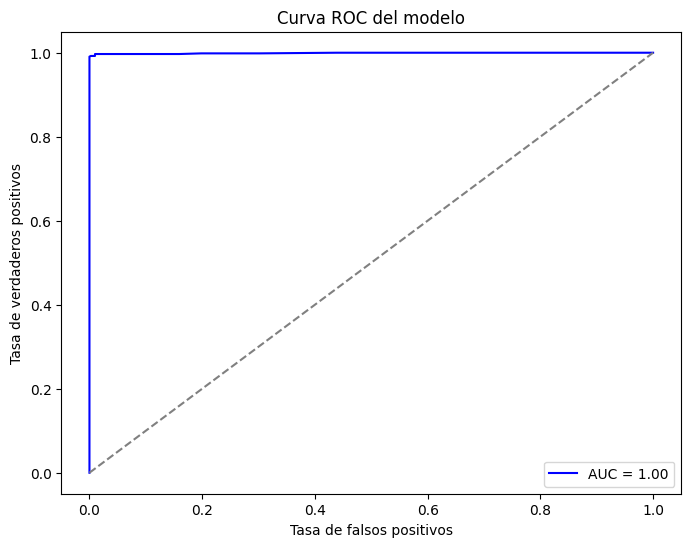

In [29]:
# Evaluación del modelo en el conjunto de entrenamiento
y_pred_train = stacking_clf.predict(X_train_norm)

# Métricas de rendimiento
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(Y_train, y_pred_train):.4f}")
print(classification_report(Y_train, y_pred_train))


# Obtener probabilidades de predicción del modelo
y_proba = stacking_clf.predict_proba(X_train_norm)[:, 1]  # Solo la probabilidad de la clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(Y_train, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # Línea de referencia
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC del modelo")
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       101
           1       0.99      0.96      0.98       163

    accuracy                           0.97       264
   macro avg       0.97      0.97      0.97       264
weighted avg       0.97      0.97      0.97       264



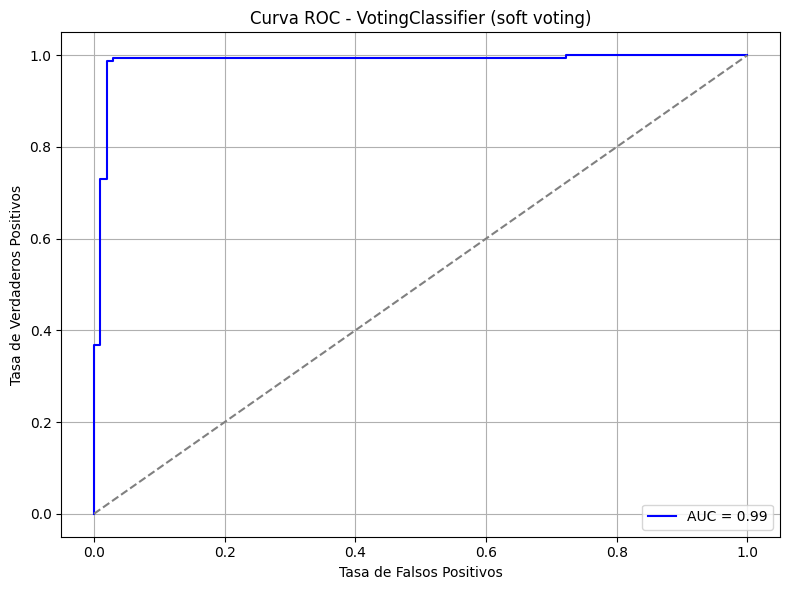

['ensamble_VOT_dataset1.pkl']

In [30]:
from sklearn.ensemble import VotingClassifier

voting_clf_soft = VotingClassifier(estimators=modelos_base, voting='soft')
voting_clf_soft.fit(X_train_norm, Y_train)
y_proba = voting_clf_soft.predict_proba(X_test_norm)[:, 1]

y_pred_test = voting_clf_soft.predict(X_test_norm)
print(classification_report(Y_test, y_pred_test))

# Calcular curva ROC
fpr, tpr, _ = roc_curve(Y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - VotingClassifier (soft voting)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

joblib.dump(stacking_clf, 'ensamble_VOT_dataset1.pkl')

Accuracy: 0.9962
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       1.00      1.00      1.00       647

    accuracy                           1.00      1055
   macro avg       1.00      1.00      1.00      1055
weighted avg       1.00      1.00      1.00      1055



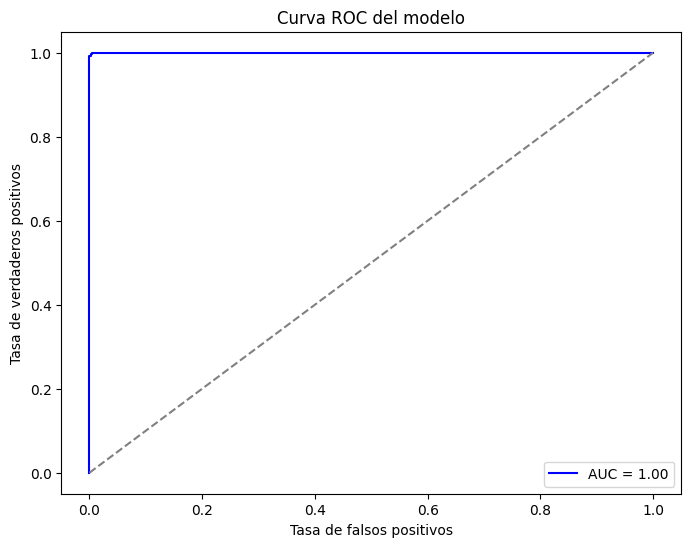

In [31]:
y_pred_train = voting_clf_soft.predict(X_train_norm)

# Métricas de rendimiento
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(Y_train, y_pred_train):.4f}")
print(classification_report(Y_train, y_pred_train))


# Obtener probabilidades de predicción del modelo
y_proba = voting_clf_soft.predict_proba(X_train_norm)[:, 1] 

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(Y_train, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # Línea de referencia
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC del modelo")
plt.legend()
plt.show()

Accuracy: 0.9886
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       101
           1       0.99      0.99      0.99       163

    accuracy                           0.99       264
   macro avg       0.99      0.99      0.99       264
weighted avg       0.99      0.99      0.99       264



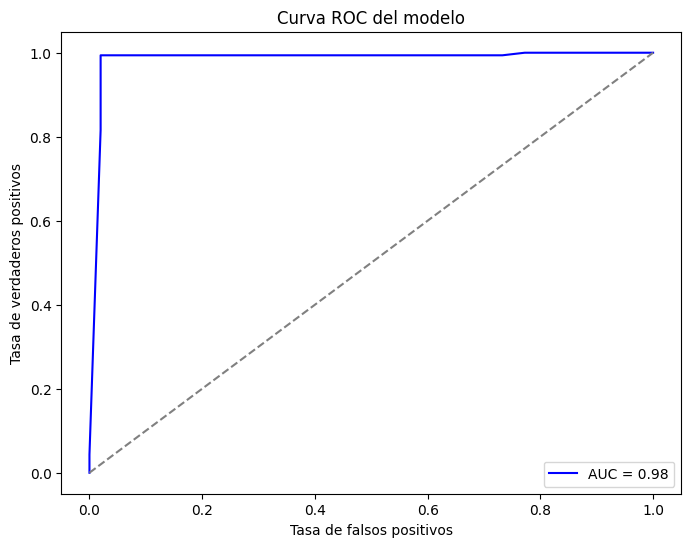

['ensamble_GBC_dataset2.pkl']

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Metamodelo (combinador)
metamodelo = GradientBoostingClassifier()

# Crear el StackingClassifier
stacking_clf = StackingClassifier(cv=10, n_jobs=-1, estimators=modelos_base, final_estimator=metamodelo, passthrough=True)

# Entrenar el modelo con los datos seleccionados
stacking_clf.fit(X_train_norm, Y_train)

# Evaluación del modelo en el conjunto de prueba
y_pred = stacking_clf.predict(X_test_norm)

# Métricas de rendimiento
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(Y_test, y_pred):.4f}")
print(classification_report(Y_test, y_pred))

# Obtener probabilidades de predicción del modelo
y_proba = stacking_clf.predict_proba(X_test_norm)[:, 1]  # Solo la probabilidad de la clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(Y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # Línea de referencia
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC del modelo")
plt.legend()
plt.show()

joblib.dump(stacking_clf, 'ensamble_GBC_dataset2.pkl')